In [8]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import time
from pathlib import Path
import os

In [15]:
# Paths to timings data
#fenics_timings = "/home/cecile/dev/fenics-networks/applications/fenics/plot_perf_lm_spaces/timings_lm_spaces.txt"
#fenicsx_timings = "/home/cecile/dev/networks_fenicsx/demos/demo_perf_lm_spaces/timings_lm_spaces.txt"

current_dir = os.getcwd()
fenics_timings = "/home/cecile/dev/fenics-networks/applications/fenics/plots_perf/timings_lm_spaces.txt"
fenicsx_timings = "/home/cecile/dev/networks_fenicsx/demos/demo_perf_lm_spaces_docker2/timings_lm_spaces.txt"

In [16]:
# Translate timings table into dictionnaries
df_fenics = pd.read_csv(fenics_timings, sep = "\t", index_col=0, header=0)
df_fenicsx = pd.read_csv(fenicsx_timings, sep = "\t", index_col=0)
fenics_dict = df_fenics.to_dict()
fenicsx_dict = df_fenicsx.to_dict()
print("fenics_dict = ", fenics_dict)

fenics_dict =  {'forms': {2.0: 1.087, 3.0: 1.032, 4.0: 1.043, 5.0: 1.091, 6.0: 1.238}, 'assembly': {2.0: 6.527, 3.0: 14.898, 4.0: 32.553, 5.0: 74.686, 6.0: 210.477}, 'solve': {2.0: 0.001, 3.0: 0.002, 4.0: 0.004, 5.0: 0.006, 6.0: 0.012}}


In [17]:
def n_dict(d: dict):
    new_dict = dict()
    for i,n in enumerate(list(d["forms"].keys())):
        new_dict[n] = dict()
        for key in list(d.keys()):
            new_dict[n][key] = list(d[key].values())[i]
    return new_dict

In [18]:
# Transform initial dictionnary into {n: {forms: x, assembly: x, solve: x}, ... }
fenics_n_dict = n_dict(fenics_dict)
fenicsx_n_dict = n_dict(fenicsx_dict)
#print("fenics_n_dict = ", fenics_n_dict)
#print("fenicsx_n_dict = ", fenicsx_n_dict)

n =  2.0
forms : 0.7 x faster
assembly : 1631.8 x faster
n =  3.0
forms : 0.7 x faster
assembly : 4966.0 x faster
n =  4.0
forms : 0.7 x faster
assembly : 6510.6 x faster
n =  5.0
forms : 0.6 x faster
assembly : 4393.3 x faster
n =  6.0
forms : 0.7 x faster
assembly : 7257.8 x faster


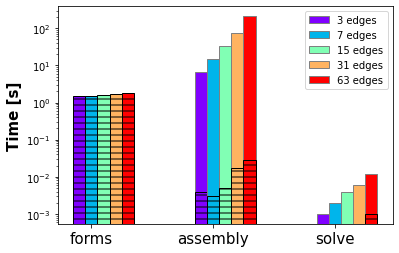

In [19]:
# Bar plots - all the data in the same plot

barWidth = 0.1

# Set position of bar on X axis
first_key = list(fenics_n_dict.keys())[0]
br = np.arange(len(fenics_n_dict[first_key].keys()))
br = [x - barWidth for x in br]
# print("br = ", br)

# Make the plot
color = iter(plt.cm.rainbow(np.linspace(0, 1, len(list(fenics_n_dict.keys())))))
fig, ax = plt.subplots()
ax.set_yscale('log')

n_edges = 1
for i,key in enumerate(list(fenics_n_dict.keys())):
    n_edges += int(pow(2,key-1))
    c = next(color)
    # print("fenics_n_dict[", key, "].values() = ", fenics_n_dict[key].values())
    # print("fenicsx_n_dict[", key, "].values() = ", fenicsx_n_dict[key].values())
    ax.bar(br, fenics_n_dict[key].values(), color=c, width=barWidth, 
           edgecolor='grey', label=str(n_edges) + " edges")
    ax.bar(br, fenicsx_n_dict[key].values(), color=c, width=barWidth, 
           edgecolor='black', hatch='--')
    br = [x + barWidth for x in br]
    
    # Compute how much faster
    forms_gain = list(fenics_n_dict[key].values())[0]/list(fenicsx_n_dict[key].values())[0]
    assembly_gain = list(fenics_n_dict[key].values())[1]/list(fenicsx_n_dict[key].values())[1]
    print("n = ", key)
    print("forms : %.1f x faster" % forms_gain)
    print("assembly : %.1f x faster" % assembly_gain)

# Adding labels / ticks
xlabels = ["forms", "assembly", "solve"]
ax.set_ylabel('Time [s]', fontweight='bold', fontsize=15)
ax.set_xticks(range(len(br)))
ax.set_xticklabels(xlabels, fontsize=15)
ax.legend()

# plt.savefig("/home/cecile/dev/networks_fenicsx/demos/demo_perf_lm_spaces/timings_comp.png",
#             facecolor='white',
#             transparent=False,
#             dpi=300,
#             format="png")



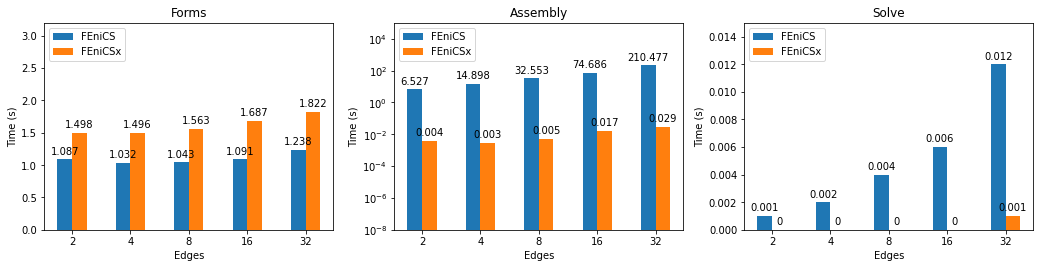

In [20]:
# Bar plots - one plot per task (forms - assembly - solve)
fig, (ax_forms, ax_assembly, ax_solve) = plt.subplots(1, 3)
fig.set_figwidth(15)
fig.tight_layout(pad=3.0)

ns = list(fenics_n_dict.keys())
nb_edges = [int(pow(2,key-1)) for key in ns]

x = np.arange(len(ns))  # the label locations
width = 0.25  # the width of the bars

### ----------- Forms ----------- ###
#ax_forms.set_yscale('log')
fenics_forms = fenics_dict["forms"]
fenicsx_forms = fenicsx_dict["forms"]
forms_dict = {'FEniCS': fenics_forms.values(), 'FEniCSx': fenicsx_forms.values()}

multiplier = 0
for attribute, measurement in forms_dict.items():
    offset = width * multiplier
    rects = ax_forms.bar(x + offset, measurement, width, label=attribute)
    ax_forms.bar_label(rects, padding=3)
    multiplier += 1

ax_forms.set_ylabel('Time (s)')
ax_forms.set_xlabel('Edges')
ax_forms.set_title('Forms')
ax_forms.set_xticks(x + width/2, labels=[str(n) for n in nb_edges])
ax_forms.legend(loc='upper left')
ax_forms.set_ylim(0, 3.2)
### -------------------------------- ###

### ----------- Assembly ----------- ###
ax_assembly.set_yscale('log')
fenics_assembly = fenics_dict["assembly"]
fenicsx_assembly = fenicsx_dict["assembly"]
assembly_dict = {'FEniCS': fenics_assembly.values(), 'FEniCSx': fenicsx_assembly.values()}

multiplier = 0
for attribute, measurement in assembly_dict.items():
    offset = width * multiplier
    rects = ax_assembly.bar(x + offset, measurement, width, label=attribute)
    ax_assembly.bar_label(rects, padding=3)
    multiplier += 1
    
ax_assembly.set_ylabel('Time (s)')
ax_assembly.set_xlabel('Edges')
ax_assembly.set_title('Assembly')
ax_assembly.set_xticks(x + width/2, labels=[str(n) for n in nb_edges])
ax_assembly.legend(loc='upper left')
ax_assembly.set_ylim(1e-8, 10**5)
### -------------------------------- ###

### ----------- Solve ----------- ###
#ax_solve.set_yscale('log')
fenics_solve = fenics_dict["solve"]
fenicsx_solve = fenicsx_dict["solve"]
solve_dict = {'FEniCS': fenics_solve.values(), 'FEniCSx': fenicsx_solve.values()}

multiplier = 0
for attribute, measurement in solve_dict.items():
    offset = width * multiplier
    rects = ax_solve.bar(x + offset, measurement, width, label=attribute)
    ax_solve.bar_label(rects, padding=3)
    multiplier += 1
    
ax_solve.set_ylabel('Time (s)')
ax_solve.set_xlabel('Edges')
ax_solve.set_title('Solve')
ax_solve.set_xticks(x + width/2, labels=[str(n) for n in nb_edges])
ax_solve.legend(loc='upper left')
ax_solve.set_ylim(0, 0.015)
### -------------------------------- ###

Path(current_dir + "/../demos/plots_lm_spaces").mkdir(exist_ok=True)
timestr = time.strftime("%d%m%Y-%H%M%S")
plt.savefig(current_dir + "/../demos/plots_lm_spaces/time_forms_" + timestr + ".png",
                           facecolor='white',
                           dpi=300,
                           format="png")
